<a href="https://colab.research.google.com/github/fransiska-mukti/DeepLearningTasks/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set Up Your Google Colab Notebook

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
missing_values = data.isnull().sum()
print(missing_values)

In [11]:
#Load and Preprocess the Data

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
labels = data['label'].values  # assuming 'label' is your target column
data.drop(['label'], axis=1, inplace=True)  # drop the label from the training data

# Define columns that need one-hot encoding and numerical columns for scaling
categorical_cols = ['proto', 'service', 'state']
numerical_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean']

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations
data_processed = preprocessor.fit_transform(data)


In [12]:
#Prepare Data for LSTM

import numpy as np

# Reshape data for LSTM: [samples, time steps, features]
data_processed = data_processed.toarray()
data_processed = data_processed.reshape(data_processed.shape[0], 1, data_processed.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_processed, labels, test_size=0.2, random_state=42)


In [13]:
#Define and Compile the LSTM Model

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
#Train the Model

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
2192/2192 [==============================] - 18s 6ms/step - loss: 0.1809 - accuracy: 0.9265 - val_loss: 0.1500 - val_accuracy: 0.9315
Epoch 2/10
2192/2192 [==============================] - 14s 6ms/step - loss: 0.1444 - accuracy: 0.9343 - val_loss: 0.1428 - val_accuracy: 0.9320
Epoch 3/10
2192/2192 [==============================] - 14s 7ms/step - loss: 0.1406 - accuracy: 0.9343 - val_loss: 0.1427 - val_accuracy: 0.9324
Epoch 4/10
2192/2192 [==============================] - 18s 8ms/step - loss: 0.1383 - accuracy: 0.9343 - val_loss: 0.1386 - val_accuracy: 0.9321
Epoch 5/10
2192/2192 [==============================] - 17s 8ms/step - loss: 0.1371 - accuracy: 0.9344 - val_loss: 0.1377 - val_accuracy: 0.9306
Epoch 6/10
2192/2192 [==============================] - 12s 6ms/step - loss: 0.1362 - accuracy: 0.9343 - val_loss: 0.1362 - val_accuracy: 0.9326
Epoch 7/10
2192/2192 [==============================] - 13s 6ms/step - loss: 0.1354 - accuracy: 0.9343 - val_loss: 0.1367 - val_ac

In [15]:
#Evaluate the Model

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1342
Test Accuracy: 0.9331


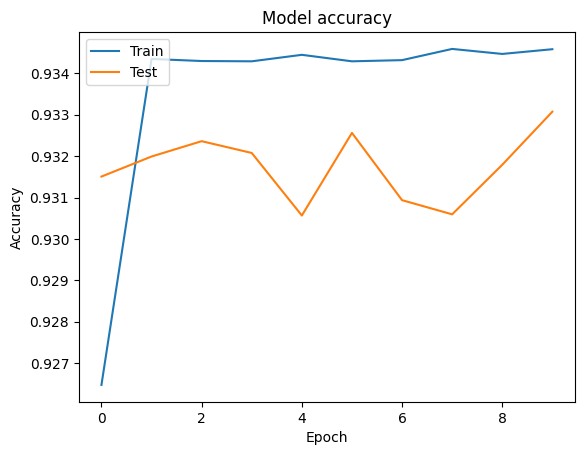

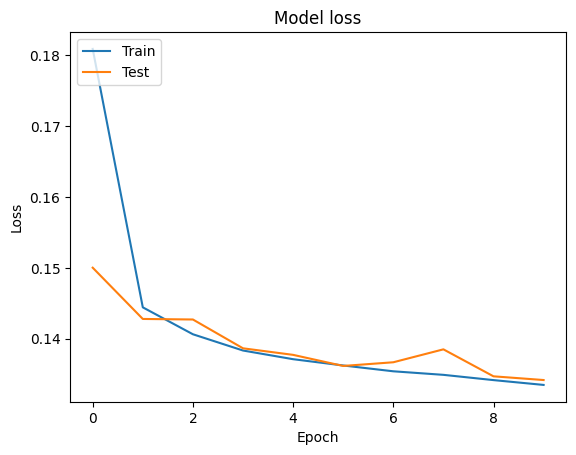

In [16]:
#Visualize Training History

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [23]:
#Testing with New Dataset

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the new testing dataset
new_test_data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

# Extract labels
new_test_labels = new_test_data['label'].values
new_test_data.drop(['label'], axis=1, inplace=True)

# Define columns for encoding and scaling as before
categorical_cols = ['proto', 'service', 'state']
numerical_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean']

# Apply the same transformations used on the training set
# IMPORTANT: Use the same preprocessor object used during the training data preparation to ensure the same scaling and encoding
new_test_processed = preprocessor.transform(new_test_data).toarray()

# Reshape data for LSTM: [samples, time steps, features]
new_test_processed = new_test_processed.reshape(new_test_processed.shape[0], 1, new_test_processed.shape[1])


In [24]:
#Define and Compile the LSTM Model

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
#Train the Model

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
1030/1030 [==============================] - 9s 6ms/step - loss: 0.3037 - accuracy: 0.8418 - val_loss: 0.2311 - val_accuracy: 0.8756
Epoch 2/10
1030/1030 [==============================] - 8s 7ms/step - loss: 0.2199 - accuracy: 0.8832 - val_loss: 0.2141 - val_accuracy: 0.8877
Epoch 3/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2083 - accuracy: 0.8924 - val_loss: 0.2061 - val_accuracy: 0.8926
Epoch 4/10
1030/1030 [==============================] - 7s 6ms/step - loss: 0.2024 - accuracy: 0.8977 - val_loss: 0.1995 - val_accuracy: 0.8960
Epoch 5/10
1030/1030 [==============================] - 6s 6ms/step - loss: 0.1996 - accuracy: 0.8991 - val_loss: 0.1955 - val_accuracy: 0.9068
Epoch 6/10
1030/1030 [==============================] - 8s 8ms/step - loss: 0.1971 - accuracy: 0.9008 - val_loss: 0.1930 - val_accuracy: 0.9080
Epoch 7/10
1030/1030 [==============================] - 6s 5ms/step - loss: 0.1952 - accuracy: 0.9019 - val_loss: 0.1921 - val_accuracy:

In [26]:
from keras.models import load_model

# Assuming the model is loaded if this is a new session
# model = load_model('path_to_your_saved_model.h5')

# Evaluate the model on the new test data
loss, accuracy = model.evaluate(new_test_processed, new_test_labels, verbose=0)
print(f"New Test Loss: {loss:.4f}")
print(f"New Test Accuracy: {accuracy:.4f}")


New Test Loss: 0.1893
New Test Accuracy: 0.9068


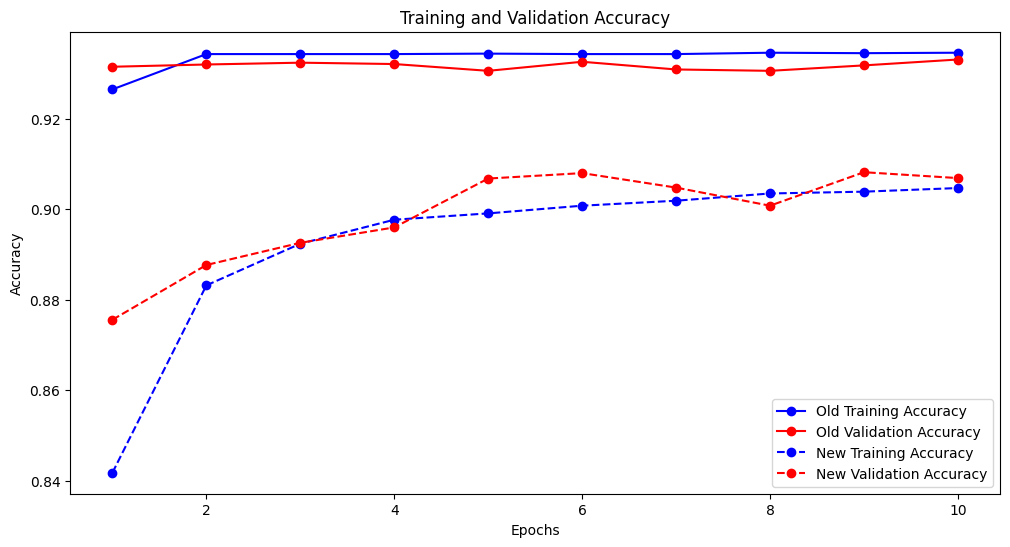

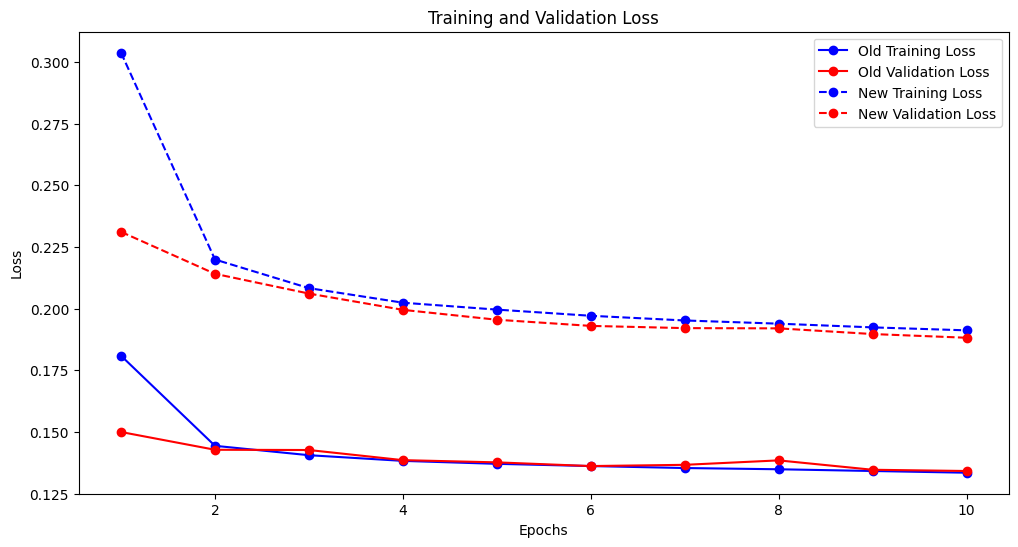

In [29]:
import matplotlib.pyplot as plt

# Old dataset metrics
old_train_acc = [0.9265, 0.9343, 0.9343, 0.9343, 0.9344, 0.9343, 0.9343, 0.9346, 0.9345, 0.9346]
old_val_acc = [0.9315, 0.9320, 0.9324, 0.9321, 0.9306, 0.9326, 0.9309, 0.9306, 0.9318, 0.9331]
old_train_loss = [0.1809, 0.1444, 0.1406, 0.1383, 0.1371, 0.1362, 0.1354, 0.1349, 0.1342, 0.1335]
old_val_loss = [0.1500, 0.1428, 0.1427, 0.1386, 0.1377, 0.1362, 0.1367, 0.1385, 0.1347, 0.1342]

# New dataset metrics
new_train_acc = [0.8418, 0.8832, 0.8924, 0.8977, 0.8991, 0.9008, 0.9019, 0.9035, 0.9039, 0.9047]
new_val_acc = [0.8756, 0.8877, 0.8926, 0.8960, 0.9068, 0.9080, 0.9048, 0.9008, 0.9082, 0.9069]
new_train_loss = [0.3037, 0.2199, 0.2083, 0.2024, 0.1996, 0.1971, 0.1952, 0.1939, 0.1924, 0.1912]
new_val_loss = [0.2311, 0.2141, 0.2061, 0.1995, 0.1955, 0.1930, 0.1921, 0.1920, 0.1897, 0.1882]

epochs = range(1, 11)

# Accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, old_train_acc, 'b-o', label='Old Training Accuracy')
plt.plot(epochs, old_val_acc, 'r-o', label='Old Validation Accuracy')
plt.plot(epochs, new_train_acc, 'b--o', label='New Training Accuracy')
plt.plot(epochs, new_val_acc, 'r--o', label='New Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, old_train_loss, 'b-o', label='Old Training Loss')
plt.plot(epochs, old_val_loss, 'r-o', label='Old Validation Loss')
plt.plot(epochs, new_train_loss, 'b--o', label='New Training Loss')
plt.plot(epochs, new_val_loss, 'r--o', label='New Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
